#Descargar libreria

In [1]:
!pip install roboflow ultralytics


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: c:\Users\User\Documents\UdeA\GEPAR\SIMAYA\Simaya_software\.venv\Scripts\python.exe -m pip install --upgrade pip


#Cargar dataset

In [2]:
from roboflow import Roboflow

rf = Roboflow(api_key="zJoD5JuUx4VbFz2GD5yc")
project = rf.workspace("pieces-count").project("pieces-count-n7jac")
version = project.version(2)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pieces-Count-2 in yolov11:: 100%|██████████| 3306/3306 [00:04<00:00, 751.14it/s]


#Cargar modelo

In [ ]:
from ultralytics import YOLO
model=YOLO("yolo11s.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


#Entrenar modelo

In [ ]:
data_path="/content/Pieces-Count-2/data.yaml"
results=model.train(data=data_path, epochs=40, imgsz=640,batch=2,device=0)


#Predicciones

In [ ]:
custom_model = YOLO('/content/runs/detect/train2/weights/best.pt')


##Test inferencia

In [ ]:
res=custom_model.predict(
    source="/content/Pieces-Count-2/test/images",  # carpeta completa de test
    imgsz=640,
    conf=0.25,
    save=True   # guarda las imágenes con detecciones
)


image 1/47 /content/Pieces-Count-2/test/images/WIN_20251121_10_58_33_Pro_f11920_jpg.rf.6603ce1d9a593c59c98d988f9793c9a3.jpg: 640x640 2 Tapa NMAXs, 15.8ms
image 2/47 /content/Pieces-Count-2/test/images/WIN_20251121_10_58_33_Pro_f12516_jpg.rf.01504a72f976b8e8e2fafa58190b72f3.jpg: 640x640 2 Tapa NMAXs, 16.4ms
image 3/47 /content/Pieces-Count-2/test/images/WIN_20251121_10_58_33_Pro_f25628_jpg.rf.0f279a764e82475be32ddc3b0ff6a73e.jpg: 640x640 2 Tapa NMAXs, 16.8ms
image 4/47 /content/Pieces-Count-2/test/images/WIN_20251122_14_06_48_Pro_f13134_jpg.rf.74e3887e1280bd2b5f56fc2f0fff8cd4.jpg: 640x640 2 Tapa NMAXs, 18.2ms
image 5/47 /content/Pieces-Count-2/test/images/WIN_20251122_14_06_48_Pro_f4179_jpg.rf.ae9a46fa1b6012c4d479e757915ba256.jpg: 640x640 3 Tapa NMAXs, 15.7ms
image 6/47 /content/Pieces-Count-2/test/images/WIN_20251122_14_06_48_Pro_f9552_jpg.rf.aa96c56d2c7834ad65be614a721e9074.jpg: 640x640 3 Tapa NMAXs, 15.6ms
image 7/47 /content/Pieces-Count-2/test/images/a_frame1_000008_jpg.rf.48faa26

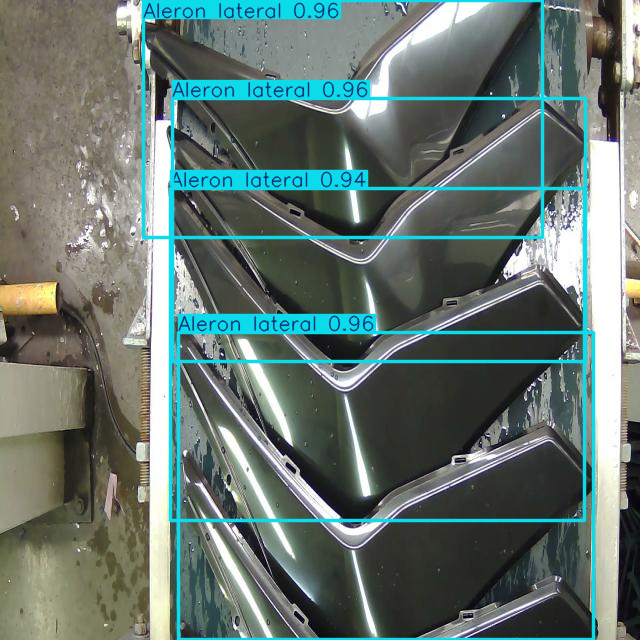

In [ ]:
res[15].show()

In [ ]:
from collections import Counter
import os

label_path = "/content/Pieces-Count-2/test/labels"

gt_counts = Counter()  # Ground Truth counts

# Obtener nombres de las clases desde el modelo
class_names = custom_model.names

# Recorrer cada archivo de labels
for file in os.listdir(label_path):
    if file.endswith(".txt"):
        with open(os.path.join(label_path, file), "r") as f:
            lines = f.readlines()
            for line in lines:
                cls_id = int(line.split()[0])  # primer número = ID de clase
                gt_counts.update([class_names[cls_id]])

print(" Conteo total por calses (ORIGINALES) ):")
for name, total in gt_counts.items():
    print(f"{name}: {total}")


 Conteo total por calses (ORIGINALES) ):
Tapa NMAX: 29
Alerones traseros: 12
Aleron: 29
Aleron lateral: 53
Tanque: 10


In [ ]:
from collections import Counter

# Diccionario acumulador
counts = Counter()

# Obtener nombres de clases del modelo
class_names = custom_model.names

# Recorrer todas las imágenes procesadas
for r in res:
    # IDs de clases detectadas en esta imagen
    cls_ids = r.boxes.cls.cpu().numpy().astype(int)

    # Convertir los IDs en nombres reales
    cls_names = [class_names[c] for c in cls_ids]

    # Acumular conteo
    counts.update(cls_names)

# Mostrar el conteo final por nombre
print("Conteo total por clase (PREDICCIÓN ):")
for name, total in counts.items():
    print(f"{name}: {total}")


Conteo total por clase (PREDICCIÓN ):
Tapa NMAX: 34
Aleron lateral: 57
Aleron: 31
Tanque: 14
Alerones traseros: 15


In [ ]:
print("\n====== COMPARACIÓN ENTRE LABELS ORIGINALES Y PREDICCIONES ======\n")

# Obtener todas las clases que aparecen en GT o en predicciones
all_classes = set(list(gt_counts.keys()) + list(counts.keys()))

print(f"{'CLASE':15} | {'ORIGINALES':15} | {'PREDICCIÓN':15} | DIFERENCIA")
print("-"*70)

for cls in all_classes:
    gt = gt_counts.get(cls, 0)
    pr = counts.get(cls, 0)
    diff = pr - gt
    print(f"{cls:15} | {gt:<15} | {pr:<15} | {diff:+d}")



====== COMPARACIÓN ENTRE LABELS ORIGINALES Y PREDICCIONES ======

CLASE           | ORIGINALES      | PREDICCIÓN      | DIFERENCIA
----------------------------------------------------------------------
Tapa NMAX       | 29              | 34              | +5
Alerones traseros | 12              | 15              | +3
Aleron lateral  | 53              | 57              | +4
Aleron          | 29              | 31              | +2
Tanque          | 10              | 14              | +4


In [ ]:
!zip -r runs.zip runs/


  adding: runs/ (stored 0%)
  adding: runs/detect/ (stored 0%)
  adding: runs/detect/train/ (stored 0%)
  adding: runs/detect/train/weights/ (stored 0%)
  adding: runs/detect/train/train_batch2.jpg (deflated 16%)
  adding: runs/detect/train/labels.jpg (deflated 32%)
  adding: runs/detect/train/train_batch0.jpg (deflated 23%)
  adding: runs/detect/train/train_batch1.jpg (deflated 13%)
  adding: runs/detect/train/args.yaml (deflated 52%)
  adding: runs/detect/train2/ (stored 0%)
  adding: runs/detect/train2/val_batch2_labels.jpg (deflated 5%)
  adding: runs/detect/train2/weights/ (stored 0%)
  adding: runs/detect/train2/weights/best.pt (deflated 8%)
  adding: runs/detect/train2/weights/last.pt (deflated 8%)
  adding: runs/detect/train2/train_batch2.jpg (deflated 10%)
  adding: runs/detect/train2/BoxPR_curve.png (deflated 21%)
  adding: runs/detect/train2/confusion_matrix.png (deflated 26%)
  adding: runs/detect/train2/labels.jpg (deflated 32%)
  adding: runs/detect/train2/val_batch1_pred

In [ ]:
from google.colab import files
files.download("runs.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>